In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [40]:
df_c = pd.read_csv('Customers.csv')
df_p = pd.read_csv('Products.csv')
df_t = pd.read_csv('Transactions.csv')

In [41]:
c_t_merge = df_t.merge(df_c, on="CustomerID")
c_t_p_merge = c_t_merge.merge(df_p, on="ProductID")

In [42]:
c_t_p_merge = c_t_p_merge.drop('Price_y', axis=1)
c_t_p_merge = c_t_p_merge.rename(columns={'Price_x': 'Price'})

In [43]:
customer_transaction_features = c_t_p_merge.groupby('CustomerID').agg({
    'TotalValue': 'sum',              
    'Quantity': 'sum',               
    'TransactionID': 'count',        
    'ProductID': 'nunique',          
    'Category': 'nunique',          
}).reset_index()

In [44]:
customer_transaction_features

,CustomerID,TotalValue,Quantity,TransactionID,ProductID,Category
0,C0001,3354.52,12,5,5,3
1,C0002,1862.74,10,4,4,2
2,C0003,2725.38,14,4,4,3
3,C0004,5354.88,23,8,8,3
4,C0005,2034.24,7,3,3,2
...,...,...,...,...,...,...
194,C0196,4982.88,12,4,3,3
195,C0197,1928.65,9,3,3,2
196,C0198,931.83,3,2,2,2
197,C0199,1979.28,9,4,4,2


In [45]:
customer_transaction_features.columns = [
    'CustomerID', 
    'TotalSpend', 
    'TotalQuantity', 
    'TransactionFrequency', 
    'ProductVariety', 
    'CategoryVariety'
]

In [46]:
customer_data = df_c.merge(customer_transaction_features, on='CustomerID')
numeric_features = customer_data[['TotalSpend', 'TotalQuantity', 'TransactionFrequency', 'ProductVariety', 'CategoryVariety']]

In [47]:
customer_data

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TotalQuantity,TransactionFrequency,ProductVariety,CategoryVariety
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,12,5,5,3
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,10,4,4,2
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,14,4,4,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,23,8,8,3
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,7,3,3,2
...,...,...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,12,4,3,3
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,9,3,3,2
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,3,2,2,2
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,9,4,4,2


In [48]:
numeric_features

,TotalSpend,TotalQuantity,TransactionFrequency,ProductVariety,CategoryVariety
0,3354.52,12,5,5,3
1,1862.74,10,4,4,2
2,2725.38,14,4,4,3
3,5354.88,23,8,8,3
4,2034.24,7,3,3,2
...,...,...,...,...,...
194,4982.88,12,4,3,3
195,1928.65,9,3,3,2
196,931.83,3,2,2,2
197,1979.28,9,4,4,2


In [49]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

In [50]:
scaled_features

array([[-0.06170143, -0.12203296, -0.01145819,  0.05004655,  0.16054032],
       [-0.87774353, -0.44800021, -0.46749414, -0.42420409, -0.90437716],
       [-0.40585722,  0.20393428, -0.46749414, -0.42420409,  0.16054032],
       [ 1.03254704,  1.67078689,  1.35664965,  1.47279848,  0.16054032],
       [-0.78392861, -0.93695108, -0.92353008, -0.89845473, -0.90437716],
       [ 0.41587942, -0.12203296, -0.46749414, -0.42420409,  0.16054032],
       [-0.48548229, -0.77396745, -0.92353008, -0.89845473, -0.90437716],
       [ 0.43997044,  1.18183602,  2.26872154,  2.42129976,  1.22545781],
       [-1.40630171, -1.58888557, -0.92353008, -0.89845473, -0.90437716],
       [-0.9571662 , -0.12203296, -0.46749414, -0.42420409, -0.90437716],
       [ 0.14369581,  0.04095066, -0.01145819,  0.05004655,  0.16054032],
       [ 0.96492372,  1.0188524 ,  0.9006137 ,  0.52429719,  0.16054032],
       [ 1.38575064,  0.85586877,  0.9006137 ,  0.99854783,  0.16054032],
       [-1.72239508, -1.75186919, -1.8

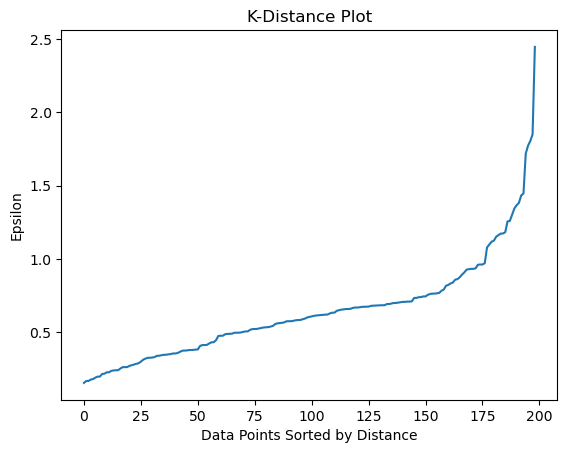

In [51]:
neighbors = NearestNeighbors(n_neighbors=5)  
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)
distances = np.sort(distances[:, -1])  
plt.plot(distances)
plt.title("K-Distance Plot")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("Epsilon")
plt.show()

In [52]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [53]:
customer_data['Cluster'] = dbscan_labels
noise_points = customer_data[customer_data['Cluster'] == -1]

In [54]:
len(noise_points)

22

In [55]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
customer_data['PCA1'] = pca_result[:, 0]
customer_data['PCA2'] = pca_result[:, 1]

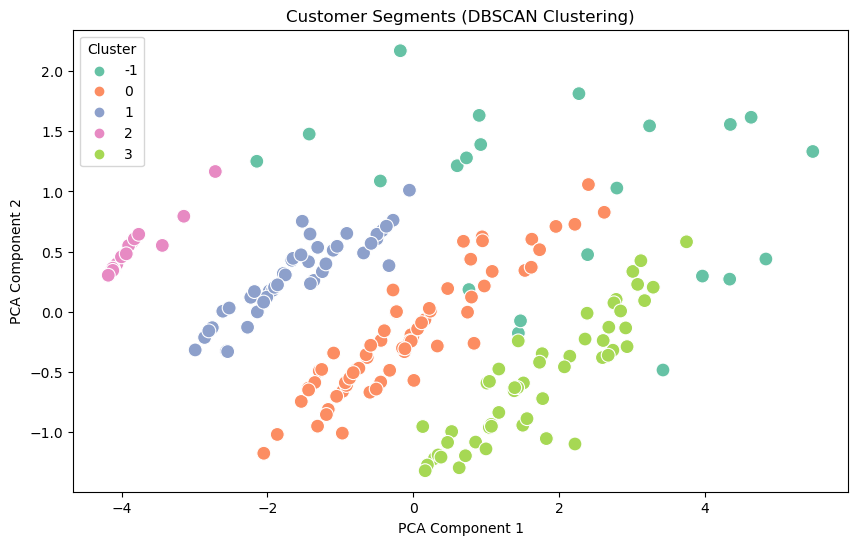

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (DBSCAN Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [59]:
number_of_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
number_of_noise_points = list(dbscan_labels).count(-1)

In [60]:
number_of_noise_points

22

In [61]:
number_of_clusters

4